In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from google.colab import userdata
from pathlib import Path
import folium
import json


In [ ]:
file_path = Path() / "electric-vehicle-charging-stations.csv"

df = pd.read_csv(file_path, sep=';')
df.head()

,start_date,station_name,charging_time_hh_mm_ss,energy_kwh,address_1,address_2,city,state_province,zip_postal_code,fee,model_number,latitude,longitude,geopoint
0,2021-03-29T16:39:10+00:00,TOWN OF CARY / P3_DTCARYDECKW,00:03:57,0.394,113 Walnut St,NaN,Cary,North Carolina,27511,0.0,CT4025-HD-GW,35.785282,-78.779282,"35.785282, -78.779282"
1,2021-03-26T22:32:56+00:00,TOWN OF CARY / P3_DTCARYDECKW,00:32:26,1.590,113 Walnut St,NaN,Cary,North Carolina,27511,0.0,CT4025-HD-GW,35.785282,-78.779282,"35.785282, -78.779282"
2,2021-02-27T20:54:16+00:00,TOWN OF CARY / BOND PARK,00:29:24,3.620,801 High House Road,Bond Park Boathouse,Cary,North Carolina,27513,0.0,CT4020-HD-GW,35.781303,-78.825554,"35.781303, -78.825554"
3,2021-02-25T23:32:53+00:00,TOWN OF CARY / P3_DTCARYDECKE,03:18:11,11.029,113 Walnut St,NaN,Cary,North Carolina,27511,0.0,CT4020-HD-GW,35.783203,-78.779266,"35.783203, -78.779266"
4,2021-02-22T13:12:40+00:00,TOWN OF CARY / P3_DTCARYDECKE,03:04:39,11.917,113 Walnut St,NaN,Cary,North Carolina,27511,0.0,CT4020-HD-GW,35.783203,-78.779266,"35.783203, -78.779266"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20142 entries, 0 to 20141
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   start_date              20142 non-null  object 
 1   station_name            20142 non-null  object 
 2   charging_time_hh_mm_ss  20142 non-null  object 
 3   energy_kwh              20142 non-null  float64
 4   address_1               20142 non-null  object 
 5   address_2               10196 non-null  object 
 6   city                    20142 non-null  object 
 7   state_province          20142 non-null  object 
 8   zip_postal_code         20142 non-null  int64  
 9   fee                     20142 non-null  float64
 10  model_number            19411 non-null  object 
 11  latitude                20142 non-null  float64
 12  longitude               20142 non-null  float64
 13  geopoint                20142 non-null  object 
dtypes: float64(4), int64(1), object(9)
mem

In [ ]:
print(df.describe(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20142 entries, 0 to 20141
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   start_date              20142 non-null  object 
 1   station_name            20142 non-null  object 
 2   charging_time_hh_mm_ss  20142 non-null  object 
 3   energy_kwh              20142 non-null  float64
 4   address_1               20142 non-null  object 
 5   address_2               10196 non-null  object 
 6   city                    20142 non-null  object 
 7   state_province          20142 non-null  object 
 8   zip_postal_code         20142 non-null  int64  
 9   fee                     20142 non-null  float64
 10  model_number            19411 non-null  object 
 11  latitude                20142 non-null  float64
 12  longitude               20142 non-null  float64
 13  geopoint                20142 non-null  object 
dtypes: float64(4), int64(1), object(9)
mem

### Station Data

I want to dive deeper into the data by station. How many sessions in each station are there? I want to assert which all address, location, fee, and model number data are the same for each data. If these are mostly unique values, we can create a separate Station dataframe to store data unique to each station.

From there we can take a look at the energy usage by kilowatt hour for each unique station, and try to depict it graphically.


In [ ]:
df["station_name"].value_counts()

,count
station_name,
TOWN OF CARY / BOND PARK,5608
TOWN OF CARY / BOND PARK BH,3241
TOWN OF CARY / CHARGER #1,1669
TOWN OF CARY / DT DECK P2 (2),1472
TOWN OF CARY / P2_DTCARYDEKCE2,1369
TOWN OF CARY / TOWN HALL-PWH,1347
TOWN OF CARY / DT DECK P3 WEST,1256
TOWN OF CARY / P3_DTCARYDECKW,873
TOWN OF CARY / P3_DTCARYDECKE,705


In [ ]:
for station in df["station_name"].unique():
  station_data = df.query(f"station_name == '{station}'")
  print(station_data["station_name"].nunique())
  print(station, station_data.nunique())
  print(station_data["address_1"].unique())



1
TOWN OF CARY / P3_DTCARYDECKW start_date                873
station_name                1
charging_time_hh_mm_ss    777
energy_kwh                786
address_1                   2
address_2                   0
city                        1
state_province              1
zip_postal_code             1
fee                         1
model_number                1
latitude                    1
longitude                   1
geopoint                    1
dtype: int64
['113 Walnut St' '119 E Park St']
1
TOWN OF CARY / BOND PARK start_date                5606
station_name                 1
charging_time_hh_mm_ss    3872
energy_kwh                4217
address_1                    1
address_2                    1
city                         1
state_province               1
zip_postal_code              1
fee                          1
model_number                 1
latitude                     1
longitude                    1
geopoint                     1
dtype: int64
['801 High House Road']
1
T

In [ ]:
for station in df["station_name"].unique():
  station_data = df.query(f"station_name == '{station}'")
  if (station_data["address_1"].nunique()) > 1:
    print(station_data["address_1"].value_counts())

address_1
113 Walnut St    537
119 E Park St    336
Name: count, dtype: int64
address_1
113 Walnut St    272
119 E Park St    135
Name: count, dtype: int64
address_1
113 Walnut St    964
117 E Park St    405
Name: count, dtype: int64
address_1
113 Walnut St    27
119 E Park St    11
Name: count, dtype: int64


We notice that 4 stations shares two addresses. I looked on Google Maps and noted that these two address are located physically on the same city block, for our purposes, I will choose to disregard this detail.


### Creating the stations dataframe

In [ ]:
categories = ["model_number", "latitude", "longitude"]
numbers = ["sessions", "meanChargeTime", "totalChargeTime", "meanEnergyKWH", "totalEnergyKWH"]
stationdf = pd.DataFrame(columns=["station"] + categories + numbers)
# stationdf.columns = categories + numbers
# print(stationdf)

for station in df["station_name"].unique():
  station_data = df.query(f"station_name == '{station}'")
  stationname = station.split('/')[1][1:]
  # print(stationname)
  newrow = {"station": stationname}
  for cat in categories:
    newrow[cat] = station_data[cat].unique()[0]
  # print(newrow)
  newrow["sessions"] = len(station_data)
  # newrow["  meanChargeTime"] = station_data["charging_time_hh_mm_ss"].mean()
  newrow["meanEnergyKWH"] = station_data["energy_kwh"].mean()
  newrow["totalEnergyKWH"] = sum(station_data["energy_kwh"])

  # chargingTime in seconds
  totaltime = 0
  for idx, row in station_data.iterrows():
    time = row["charging_time_hh_mm_ss"].split(':')
    t = int(time[0]) * 3600 + int(time[1]) * 60 + int(time[2])
    totaltime+=t
  newrow["totalChargeTime"] = totaltime
  newrow["meanChargeTime"] = totaltime/len(station_data)
  stationdf.loc[len(stationdf)] = newrow
stationdf

,station,model_number,latitude,longitude,sessions,meanChargeTime,totalChargeTime,meanEnergyKWH,totalEnergyKWH
0,P3_DTCARYDECKW,CT4025-HD-GW,35.785282,-78.779282,873,5038.537228,4398643,7.230262,6312.019
1,BOND PARK,CT4020-HD-GW,35.781303,-78.825554,5608,4560.566334,25575656,7.030515,39427.128
2,P3_DTCARYDECKE,CT4020-HD-GW,35.783203,-78.779266,705,5620.326241,3962330,6.427926,4531.688
3,P2_DTCARYDECKE1,CT4025-HD-GW,35.785446,-78.779411,407,6982.331695,2841809,10.312270,4197.094
4,P2_DTCARYDEKCE2,CT4020-HD-GW,35.785385,-78.779701,1369,7999.571220,10951413,11.952306,16362.707
5,TOWNHALLEAST,CT4020-HD-GW,35.789215,-78.778816,425,5910.967059,2512161,8.410435,3574.435
6,P4_DTCARDECKE,CT4020-HD-GW,35.783203,-78.779366,318,3486.660377,1108758,4.839217,1538.871
7,P5_DTCARYDECKE,CT4020-HD-GW,35.783203,-78.779343,43,2258.604651,97120,3.583419,154.087
8,P6_DTCARYDECKE,CT4020-HD-GW,35.785229,-78.779495,38,6003.552632,228135,8.242237,313.205
9,CHARGER #1,8EM1110-0AH21-1AA0,35.796886,-78.808044,1669,6080.895746,10149015,6.625369,11057.741


In [ ]:
stationdf.describe()

,latitude,longitude,sessions,meanChargeTime,totalChargeTime,meanEnergyKWH,totalEnergyKWH
count,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.000000,22.000000
mean,35.786856,-78.788734,915.545455,6019.166682,5.149930e+06,9.389478,7418.233955
std,0.005261,0.016328,1306.187499,2350.435786,6.437750e+06,4.480900,9600.483376
min,35.781303,-78.825554,1.000000,1754.869565,8.551000e+03,3.583419,8.263000
25%,35.783203,-78.800592,98.750000,5073.643512,9.232198e+05,7.296377,1493.492250
50%,35.785282,-78.779411,400.500000,5945.971481,2.286620e+06,8.252618,3286.970000
75%,35.788273,-78.779297,1324.250000,6899.811102,9.124114e+06,10.233963,10788.661500
max,35.797245,-78.778816,5608.000000,13515.159420,2.557566e+07,22.383000,39427.128000


In [ ]:
time = df["charging_time_hh_mm_ss"][0].split(':')
t = int(time[0]) * 3600 + int(time[1]) * 60 + int(time[2])
t

237

In [ ]:
minlat, maxlat, midlat = min(df["latitude"]), max(df["latitude"]), df["latitude"].median()
minlong, maxlong, midlong = min(df["longitude"]), max(df["longitude"]), df["longitude"].median()
m = folium.Map(location = (midlat, midlong),
               control_scale=True,
               zoom_control=False,
               zoom_start=14,
               min_zoom=14,
               max_zoom=14,
               )

for idx, row in stationdf.iterrows():
  radius = row["totalEnergyKWH"] / 1000
  # station_data = df.query(f"station_name == '{station}'")
  # print(row['latitude'])
  folium.CircleMarker(
    location=(row["latitude"], row["longitude"]),
    radius=radius,
    color="cornflowerblue",
    stroke=False,
    fill=True,
    fill_opacity=0.5,
    fill_color='red',
    opacity=1,
    popup="{} pixels".format(radius),
    tooltip="I am in pixels",
  ).add_to(m)

m


# Grouping Charging Stations
As seen by the map above, there is a lot of overlap in charging station locations. There appears to be 5 main locations with different locations for each. I will group the stations by geographic location (latitude, longitude) by threshold. Then I will combine energy usage and time metrics for each major grouped location.

In [ ]:
threshold = 0.003

stationdf['rlat'] = (stationdf['latitude'] / threshold).astype(int)
stationdf['rlong'] = (stationdf['longitude'] / threshold).astype(int)


#grouped df
sumdf = stationdf.groupby(['rlat', 'rlong']).sum()
meandf = stationdf.drop(["station", "model_number", "totalEnergyKWH"], axis=1).groupby(['rlat', 'rlong']).mean()
# sumdf['rlat'].index[1] =  3
# meandf['rlat'].loc[1] =  3

ddf = pd.merge(sumdf, meandf, how="left", suffixes = ("_sum", "_mean"))
# print(ddf)

minlat, maxlat, midlat = min(stationdf["latitude"]), max(stationdf["latitude"]), meandf["latitude"].mean()
minlong, maxlong, midlong = min(stationdf["longitude"]), max(stationdf["longitude"]), meandf["longitude"].mean()
m = folium.Map(location = (midlat, midlong),
               control_scale=True,
               zoom_control=False,
               zoom_start=14,
               min_zoom=14,
               max_zoom=14,
               )
# print(gdf)
# print(sumdf.index)
# print(meandf.index)
# print(ddf)
for idx, row in meandf.iterrows():
  # print(idx, row)
  radius = 5
  # print(radius)
   #row["totalEnergyKWH"] / 1000
  # station_data = df.query(f"station_name == '{station}'")
  # print(row['latitude'])
  folium.CircleMarker(
    location=(row["latitude"], row["longitude"]),
    radius=radius,
    color="cornflowerblue",
    stroke=False,
    fill=True,
    fill_opacity=1,
    fill_color='red',
    opacity=1,
    popup="{} pixels".format(radius),
    tooltip="I am in pixels",
  ).add_to(m)

m


/tmp/ipython-input-4238808227.py:13: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  ddf = pd.merge(sumdf, meandf, how="left", suffixes = ("_sum", "_mean"))


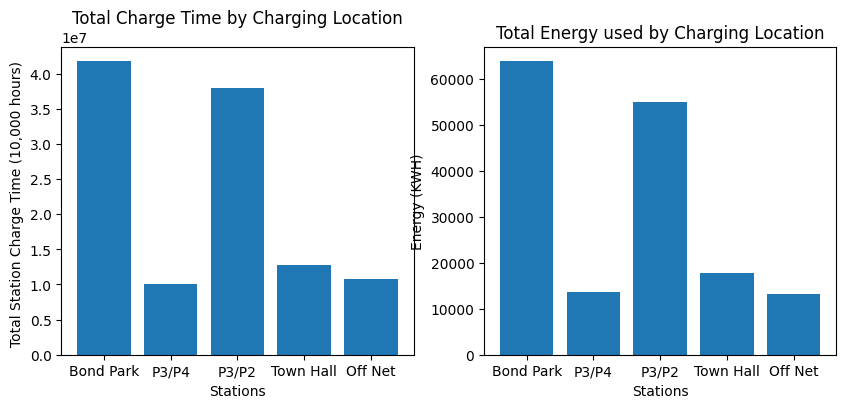

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
# print((sumdf["station"]))


labels = ["Bond Park", "P3/P4", "P3/P2", "Town Hall", "Off Net"]
axes[0].bar(labels, sumdf["totalChargeTime"])
axes[0].set_title("Total Charge Time by Charging Location")
axes[0].set_xlabel("Stations")
axes[0].set_ylabel("Total Station Charge Time (10,000 hours) ")


axes[1].bar(labels, sumdf["totalEnergyKWH"])
axes[1].set_title("Total Energy used by Charging Location")
axes[1].set_xlabel("Stations")
axes[1].set_ylabel("Energy (KWH)")

plt.show()
# axes[0].bar_label(labels)

In [ ]:
j

<class 'pandas.core.series.Series'>
